In [1]:
# https://www.youtube.com/watch?v=qwUIFKi4V48&t=1095s
# transfer learning for classification problem

In [2]:
#!pip install pixiedust

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#import pixiedust

In [4]:
tf.__version__

'2.5.0'

In [5]:
cv2.__version__

'4.5.3'

In [6]:
img_size = 224

In [7]:
img_array = cv2.imread("my_test_pictures/eyes_closed.jpg")

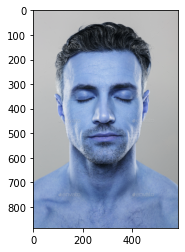

In [8]:
plt.imshow(img_array)

In [9]:
img_array.shape

(885, 590, 3)

In [10]:
img_resized = cv2.resize(img_array,(224,224))

In [11]:
img_resized.shape

(224, 224, 3)

In [12]:
img_resized_color = cv2.cvtColor(img_resized,cv2.COLOR_BGR2RGB) 

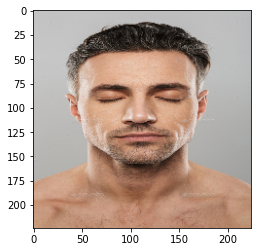

In [13]:
plt.imshow(img_resized_color)

closed_eyes


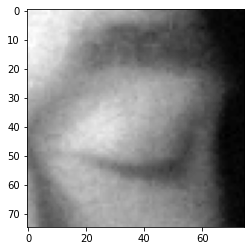

In [14]:
dataDirectory = "data/test/"
classifications = ["closed_eyes","open_eyes"]
for category in classifications:
    print(category)
    path = os.path.join(dataDirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backToRGB = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break


In [15]:
new_array = cv2.resize(backToRGB,(img_size,img_size))

In [16]:
new_array.shape

(224, 224, 3)

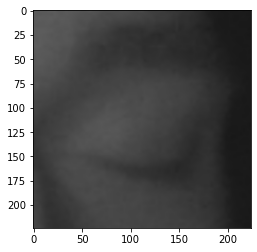

In [17]:
 plt.imshow(new_array)

# reading all the images and converting them into an array for data and labels

In [18]:
def load_image(file):
    width = 224
    height = 224
    new_img_array = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    return_normal_color = cv2.cvtColor(new_img_array,cv2.COLOR_BGR2RGB)
    final_img_array = cv2.resize(return_normal_color,(width,height))
    return final_img_array

In [19]:
training_data = []
def create_training_data():
    for category in classifications:
        print(category)
        path = os.path.join(dataDirectory,category) # create a full directory path
        class_num = classifications.index(category) # 0 (open_eyes) 1 (closed_eyes)
        for img in os.listdir(path):
            fullpath = os.path.join(path,img)
            try:
                img_array = cv2.imread(fullpath,cv2.IMREAD_GRAYSCALE)
                backToRGB = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) 
                new_array = cv2.resize(backToRGB,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
        

In [20]:
# %%pixie_debugger  -b create_training_data
create_training_data()

closed_eyes
open_eyes


In [21]:
training_data

[[array([[[92, 92, 92],
          [92, 92, 92],
          [91, 91, 91],
          ...,
          [26, 26, 26],
          [26, 26, 26],
          [26, 26, 26]],
  
         [[92, 92, 92],
          [92, 92, 92],
          [91, 91, 91],
          ...,
          [26, 26, 26],
          [26, 26, 26],
          [26, 26, 26]],
  
         [[91, 91, 91],
          [91, 91, 91],
          [90, 90, 90],
          ...,
          [26, 26, 26],
          [25, 25, 25],
          [25, 25, 25]],
  
         ...,
  
         [[70, 70, 70],
          [70, 70, 70],
          [69, 69, 69],
          ...,
          [25, 25, 25],
          [25, 25, 25],
          [25, 25, 25]],
  
         [[70, 70, 70],
          [70, 70, 70],
          [69, 69, 69],
          ...,
          [25, 25, 25],
          [25, 25, 25],
          [25, 25, 25]],
  
         [[70, 70, 70],
          [70, 70, 70],
          [69, 69, 69],
          ...,
          [25, 25, 25],
          [25, 25, 25],
          [25, 25, 25]]], dtype=u

In [22]:
print("Number of images found :",len(training_data))

Number of images found : 10


In [23]:
import random
random.shuffle(training_data)

In [24]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3)

In [25]:
X.shape

(10, 224, 224, 3)

In [26]:
# normalise data (learn to use scikit for this)
X = X/255.0;

In [27]:
Y = np.array(y) # make labels into numpy array as well

In [28]:
Y.shape # how many labels

(10,)

# deep learning

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
model = tf.keras.applications.mobilenet.MobileNet()

In [42]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Transfer learning from trained model

In [47]:
base_input = model.layers[0].input

In [48]:
base_output = model.layers[-4].output

In [49]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # one node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

NameError: name 'layers' is not defined

In [50]:
Flat_layer

NameError: name 'Flat_layer' is not defined

In [51]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

NameError: name 'keras' is not defined

In [52]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [53]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs available :",len(physical_devices))

Number of GPUs available : 0


In [54]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Training starts below:

In [40]:
new_model.fit(X,Y,epochs=10,validation_split=0.1) ## training

Epoch 1/10
1/1 [==============================] - 26s 26s/step - loss: 1.2599 - accuracy: 0.5556 - val_loss: 0.2596 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 2.7913e-04 - accuracy: 1.0000 - val_loss: 0.1076 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 2.9473e-04 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 1.9505e-04 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 6s 6s/step - loss: 1.7885e-04 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 6s 6s/step - loss: 1.6466e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 6s 6s/step - loss: 1.2432e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 8/10
1/1 

In [112]:
new_model.save('eye_model.h5')

In [56]:
new_model = tf.keras.models.load_model('models/eye_model.h5')

# Convert to TFLite

In [43]:
 import tensorflow as tf
 model=tf.keras.models.load_model("eye_model.h5")
 converter = tf.lite.TFLiteConverter.from_keras_model(model)
 converter.experimental_new_converter = True
 tflite_model = converter.convert()
 open("eye_model.tflite", "wb").write(tflite_model) 

INFO:tensorflow:Assets written to: C:\Users\Owner\AppData\Local\Temp\tmpq_rq3lvt\assets


12804100

# testing model

In [57]:
img_array = cv2.imread("data/test/open_eyes/s0001_01854_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)
#img_array = cv2.imread("test_dataset/open_eyes/s0001_01845_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backToRGB = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backToRGB,(img_size,img_size))

In [58]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [59]:
X_input.shape

(1, 224, 224, 3)

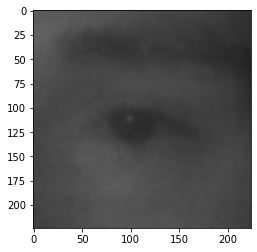

In [60]:
plt.imshow(new_array)

In [61]:
X_input=X_input/255.0

In [62]:
prediction = new_model.predict(X_input)

In [63]:
prediction[0] # positive open negative closed (result of sigmoid)

array([0.99999976], dtype=float32)

In [64]:
print("{:.3f}".format(float(prediction[0])))

1.000


# test on wild image

In [78]:
wild_image = cv2.imread('my_test_pictures/driver.jpg')

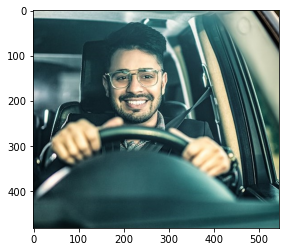

In [79]:
plt.imshow(cv2.cvtColor(wild_image,cv2.COLOR_RGB2BGR))

Newer API  need to download an add path

In [80]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [81]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [82]:
gray = cv2.cvtColor(wild_image,cv2.COLOR_BGR2GRAY)

In [83]:
print(gray.shape)

(482, 545)


In [84]:
eyes = eyeCascade.detectMultiScale(gray,1.1,4)

In [85]:
print(eyes)

[[234 133  32  32]
 [182 137  27  27]]


In [86]:
for (x,y,w,h) in eyes:
    cv2.rectangle(wild_image,(x,y),(x+w,y+h),(255,0,0),-1)
    roi_gray = gray[y:y+h,x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    print(len(eyess))

1
1


In [87]:
roi_gray

array([[112, 106,  87,  78,  76,  74,  72,  83,  85,  71,  70,  71,  95,
        109,  81,  51,  56,  75, 128, 156, 150, 132, 134, 141, 132, 105,
        122],
       [ 75,  73,  76,  67,  62,  55,  48,  53,  57,  49,  45,  60,  94,
        104,  65,  31,  43,  72, 102, 113, 136, 188, 214, 217, 227, 211,
        177],
       [ 59,  58,  60,  64,  72,  73,  67,  71,  82,  85,  97, 109, 128,
        137, 128, 117, 105,  93,  73,  58,  61,  99, 116, 123, 154, 165,
        193],
       [ 54,  56,  66,  71,  84,  96, 104, 110, 117, 121, 140, 148, 152,
        152, 160, 168, 151, 122, 120, 113, 108, 105, 100,  98,  97,  98,
        129],
       [ 56,  74,  68,  74,  88, 107, 124, 134, 142, 150, 149, 159, 162,
        155, 156, 163, 165, 161, 165, 160, 154, 145, 147, 150, 143, 145,
        145],
       [ 66,  84,  87,  91,  99, 113, 124, 129, 136, 148, 152, 153, 155,
        161, 169, 170, 165, 163, 148, 151, 146, 145, 154, 170, 179, 171,
        155],
       [ 89,  97, 110, 108, 110, 122, 13

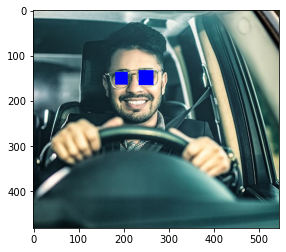

In [88]:
plt.imshow(cv2.cvtColor(wild_image,cv2.COLOR_BGR2RGB))

# crop the eye image

In [89]:
 for (x,y,w,h) in eyes:
     roi_gray = gray[y:y+h,x:x+w]
     roi_color = wild_image[y:y+h,x:x+w]
     eyes = eyeCascade.detectMultiScale(roi_gray)
     if len(eyes) == 0:
            print("eyes are not detected", len(eyes))
     else:
         for (ex,ey,ew,eh) in eyes:
             eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]

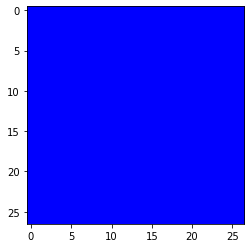

In [90]:
plt.imshow(cv2.cvtColor(roi_color,cv2.COLOR_BGR2RGB))

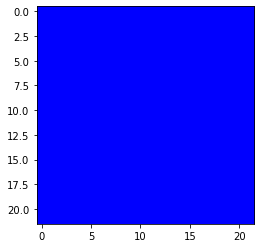

In [91]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [66]:
eyes_roi.shape

(124, 124, 3)

In [67]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image / 255.0
final_image.shape

(1, 224, 224, 3)

In [68]:
prediction = new_model.predict(final_image)
prediction

array([[0.00072747]], dtype=float32)

# Face and Eye Detection

In [92]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np
import os


In [93]:
myFaceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [94]:
myEyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [95]:
#image = cv2.imread('my_test_pictures/rani.jpeg', 0)
image = cv2.imread('my_test_pictures/eyes_closed.jpg', cv2.IMREAD_COLOR)

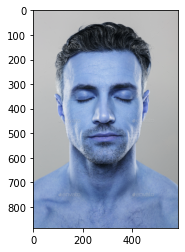

In [96]:
plt.imshow(image)

In [97]:
myFaces = faceCascade.detectMultiScale(image)

In [98]:
print('Found {} faces!'.format(len(myFaces)))

Found 1 faces!


In [99]:
image.shape

(885, 590, 3)

# Draw a rectangle around the faces

In [100]:

for (x, y, w, h) in myFaces:
    cv2.rectangle(image, (x, y), (x+w, y+h), 128, 2)
    roi = image[y:y+h, x:x+w]
    myEyes = myEyeCascade.detectMultiScale(roi)
    for (ex,ey,ew,eh) in myEyes:
        cv2.rectangle(roi,(ex,ey),(ex+ew,ey+eh),(0,0,0), 1)

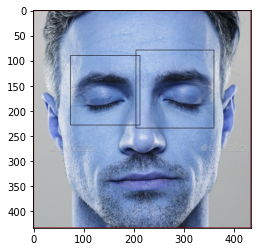

In [101]:
    plt.imshow(roi)

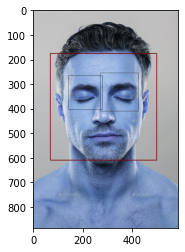

In [102]:
plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

In [103]:
roi.shape

(433, 433, 3)

# Perform Inference

In [104]:
final_image = cv2.resize(roi,(224,224)) # resize image for model

In [105]:
final_image # here is actual color values of the pixels

array([[[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [198, 198, 198],
        [198, 198, 198],
        ...,
        [191, 191, 191],
        [191, 191, 191],
        [158,  90,  90]],

       [[128,   0,   0],
        [198, 198, 198],
        [198, 198, 198],
        ...,
        [192, 192, 192],
        [192, 193, 191],
        [158,  90,  89]],

       ...,

       [[128,   0,   0],
        [177, 180, 181],
        [178, 179, 181],
        ...,
        [167, 170, 170],
        [168, 170, 171],
        [147,  79,  80]],

       [[128,   0,   0],
        [176, 180, 181],
        [176, 180, 181],
        ...,
        [167, 169, 170],
        [167, 169, 170],
        [147,  79,  79]],

       [[128,   0,   0],
        [150,  84,  84],
        [151,  84,  84],
        ...,
        [147,  79,  79],
        [147,  79,  80],
        [137,  37,  37]]

In [106]:

final_image = np.expand_dims(final_image,axis=0) # add one more dimension to array from 224,224,3 to 1,224,224,3
final_image = final_image / 255.0 # normalize array values
final_image.shape # show new dimension

(1, 224, 224, 3)

In [107]:
final_image # all pixel color values are now normalized

array([[[[0.50196078, 0.        , 0.        ],
         [0.50196078, 0.        , 0.        ],
         [0.50196078, 0.        , 0.        ],
         ...,
         [0.50196078, 0.        , 0.        ],
         [0.50196078, 0.        , 0.        ],
         [0.50196078, 0.        , 0.        ]],

        [[0.50196078, 0.        , 0.        ],
         [0.77647059, 0.77647059, 0.77647059],
         [0.77647059, 0.77647059, 0.77647059],
         ...,
         [0.74901961, 0.74901961, 0.74901961],
         [0.74901961, 0.74901961, 0.74901961],
         [0.61960784, 0.35294118, 0.35294118]],

        [[0.50196078, 0.        , 0.        ],
         [0.77647059, 0.77647059, 0.77647059],
         [0.77647059, 0.77647059, 0.77647059],
         ...,
         [0.75294118, 0.75294118, 0.75294118],
         [0.75294118, 0.75686275, 0.74901961],
         [0.61960784, 0.35294118, 0.34901961]],

        ...,

        [[0.50196078, 0.        , 0.        ],
         [0.69411765, 0.70588235, 0.70980392]

# Video Test

In [114]:
import cv2

path = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
       
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    # detect eyes
    eyes = eyeCascade.detectMultiScale(gray,1.1,4)
    for (x,y,w,h) in eyes:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),255,2)
        eyess = eyeCascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected", len(eyes))
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]
                
    final_image = cv2.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image / 255.0
    
    # predict eye status
    Predictions = new_model.predict(final_image)
    if (Predictions>0.2):
        status = "Eyes Open"
    else:
        status = "Eyes Closed"
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(Predictions)
    
    # draw rectangles
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,255),2)
        
    # overlay information
    cv2.putText(frame,str(Predictions),(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2,cv2.LINE_4)
    
    
    cv2.imshow("Eye Status",frame)
    
    # wait for q to be pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 


eyes are not detected 2
eyes are not detected 2
[[0.00034896]]
eyes are not detected 3
eyes are not detected 3
[[0.942127]]
[[1.1902714e-05]]
[[2.1539365e-05]]
eyes are not detected 1
[[2.1539365e-05]]
eyes are not detected 2
[[7.940786e-05]]
eyes are not detected 2
[[2.3530027e-05]]
eyes are not detected 3
[[3.0333313e-05]]
eyes are not detected 1
[[3.0333313e-05]]


In [115]:
new_model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x00000210B50C1198>>

# predict if eyes closed or open - low value open, high value closed

In [116]:
prediction = new_model.predict(final_image)


In [117]:
"{:.3f}".format(float(prediction[0]))

'0.000'

In [118]:
prediction

array([[3.0333313e-05]], dtype=float32)